In [1]:
import harmonica as hm

In [2]:
prism = (-100, 100, -100, 100, -1000, 500)
density = 3000

In [3]:
coordinates = (0, 0, 1000)

In [4]:
potential = hm.prism_gravity(coordinates, prism, density, field="potential")
print(potential, "J/kg")

0.011053722963867401 J/kg


In [5]:
import verde as vd

region = (-10e3, 10e3, -10e3, 10e3)
shape = (51, 51)
height = 10
coordinates = vd.grid_coordinates(region, shape=shape, extra_coords=height)

In [6]:
prism = [-2e3, 2e3, -2e3, 2e3, -1.6e3, -900]
density = 3300

In [7]:
fields = (
   "potential",
   "g_e", "g_n", "g_z",
   "g_ee", "g_nn", "g_zz", "g_en", "g_ez", "g_nz"
)

results = {}
for field in fields:
   results[field] = hm.prism_gravity(coordinates, prism, density, field=field)

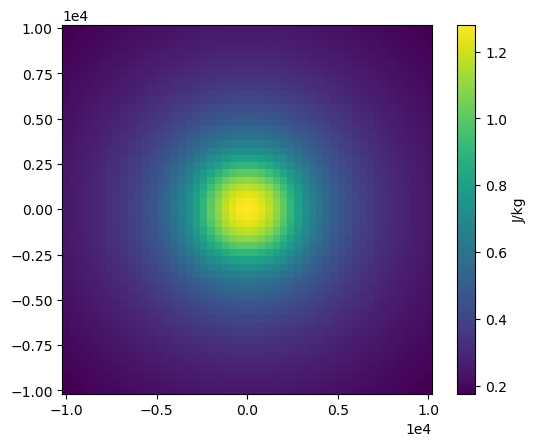

In [8]:
import matplotlib.pyplot as plt

plt.pcolormesh(coordinates[0], coordinates[1], results["potential"])
plt.gca().set_aspect("equal")
plt.gca().ticklabel_format(style="sci", scilimits=(0, 0))
plt.colorbar(label="J/kg")
plt.show()

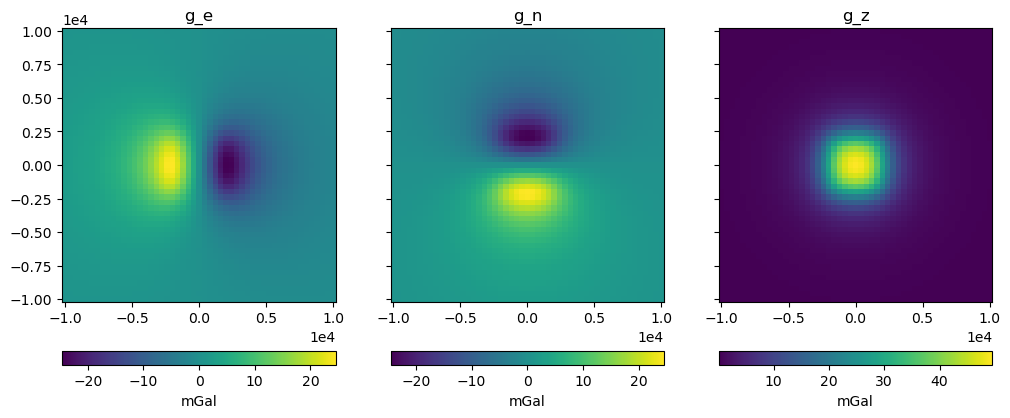

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 8))

for field, ax in zip(("g_e", "g_n", "g_z"), axes):
   tmp = ax.pcolormesh(coordinates[0], coordinates[1], results[field])
   ax.set_aspect("equal")
   ax.set_title(field)
   ax.ticklabel_format(style="sci", scilimits=(0, 0))
   plt.colorbar(tmp, ax=ax, label="mGal", orientation="horizontal", pad=0.08)
plt.show()

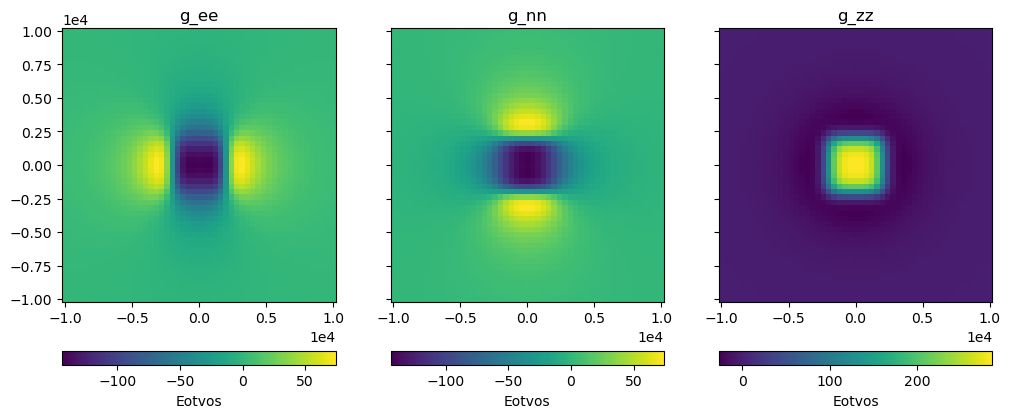

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 8))

for field, ax in zip(("g_ee", "g_nn", "g_zz"), axes):
   tmp = ax.pcolormesh(coordinates[0], coordinates[1], results[field])
   ax.set_aspect("equal")
   ax.set_title(field)
   ax.ticklabel_format(style="sci", scilimits=(0, 0))
   plt.colorbar(tmp, ax=ax, label="Eotvos", orientation="horizontal", pad=0.08)
plt.show()

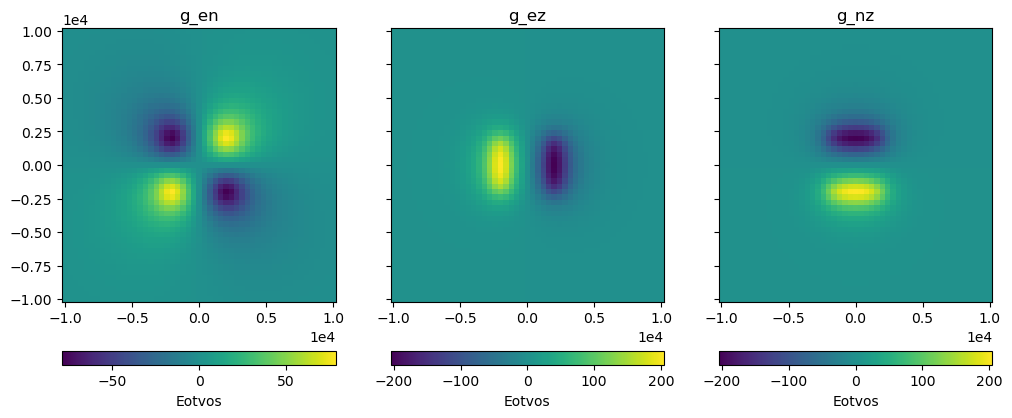

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 8))

for field, ax in zip(("g_en", "g_ez", "g_nz"), axes):
   tmp = ax.pcolormesh(coordinates[0], coordinates[1], results[field])
   ax.set_aspect("equal")
   ax.set_title(field)
   ax.ticklabel_format(style="sci", scilimits=(0, 0))
   plt.colorbar(tmp, ax=ax, label="Eotvos", orientation="horizontal", pad=0.08)
plt.show()

In [12]:
prisms = [
    [2e3, 3e3, 2e3, 3e3, -10e3, -1e3],
    [3e3, 4e3, 7e3, 8e3, -9e3, -1e3],
    [7e3, 8e3, 1e3, 2e3, -7e3, -1e3],
    [8e3, 9e3, 6e3, 7e3, -8e3, -1e3],
]
densities = [2670, 3300, 2900, 2980]

In [13]:
import verde as vd

coordinates = vd.grid_coordinates(
    region=(0, 10e3, 0, 10e3), shape=(40, 40), extra_coords=0
)

In [14]:
g_z = hm.prism_gravity(coordinates, prisms, densities, field="g_z")

In [15]:
 import pygmt

 # Needed so that displaying works on jupyter-sphinx and sphinx-gallery at
 # the same time. Using PYGMT_USE_EXTERNAL_DISPLAY="false" in the Makefile
 # for sphinx-gallery to work means that fig.show won't display anything here
 # either.
 pygmt.set_display(method="notebook")

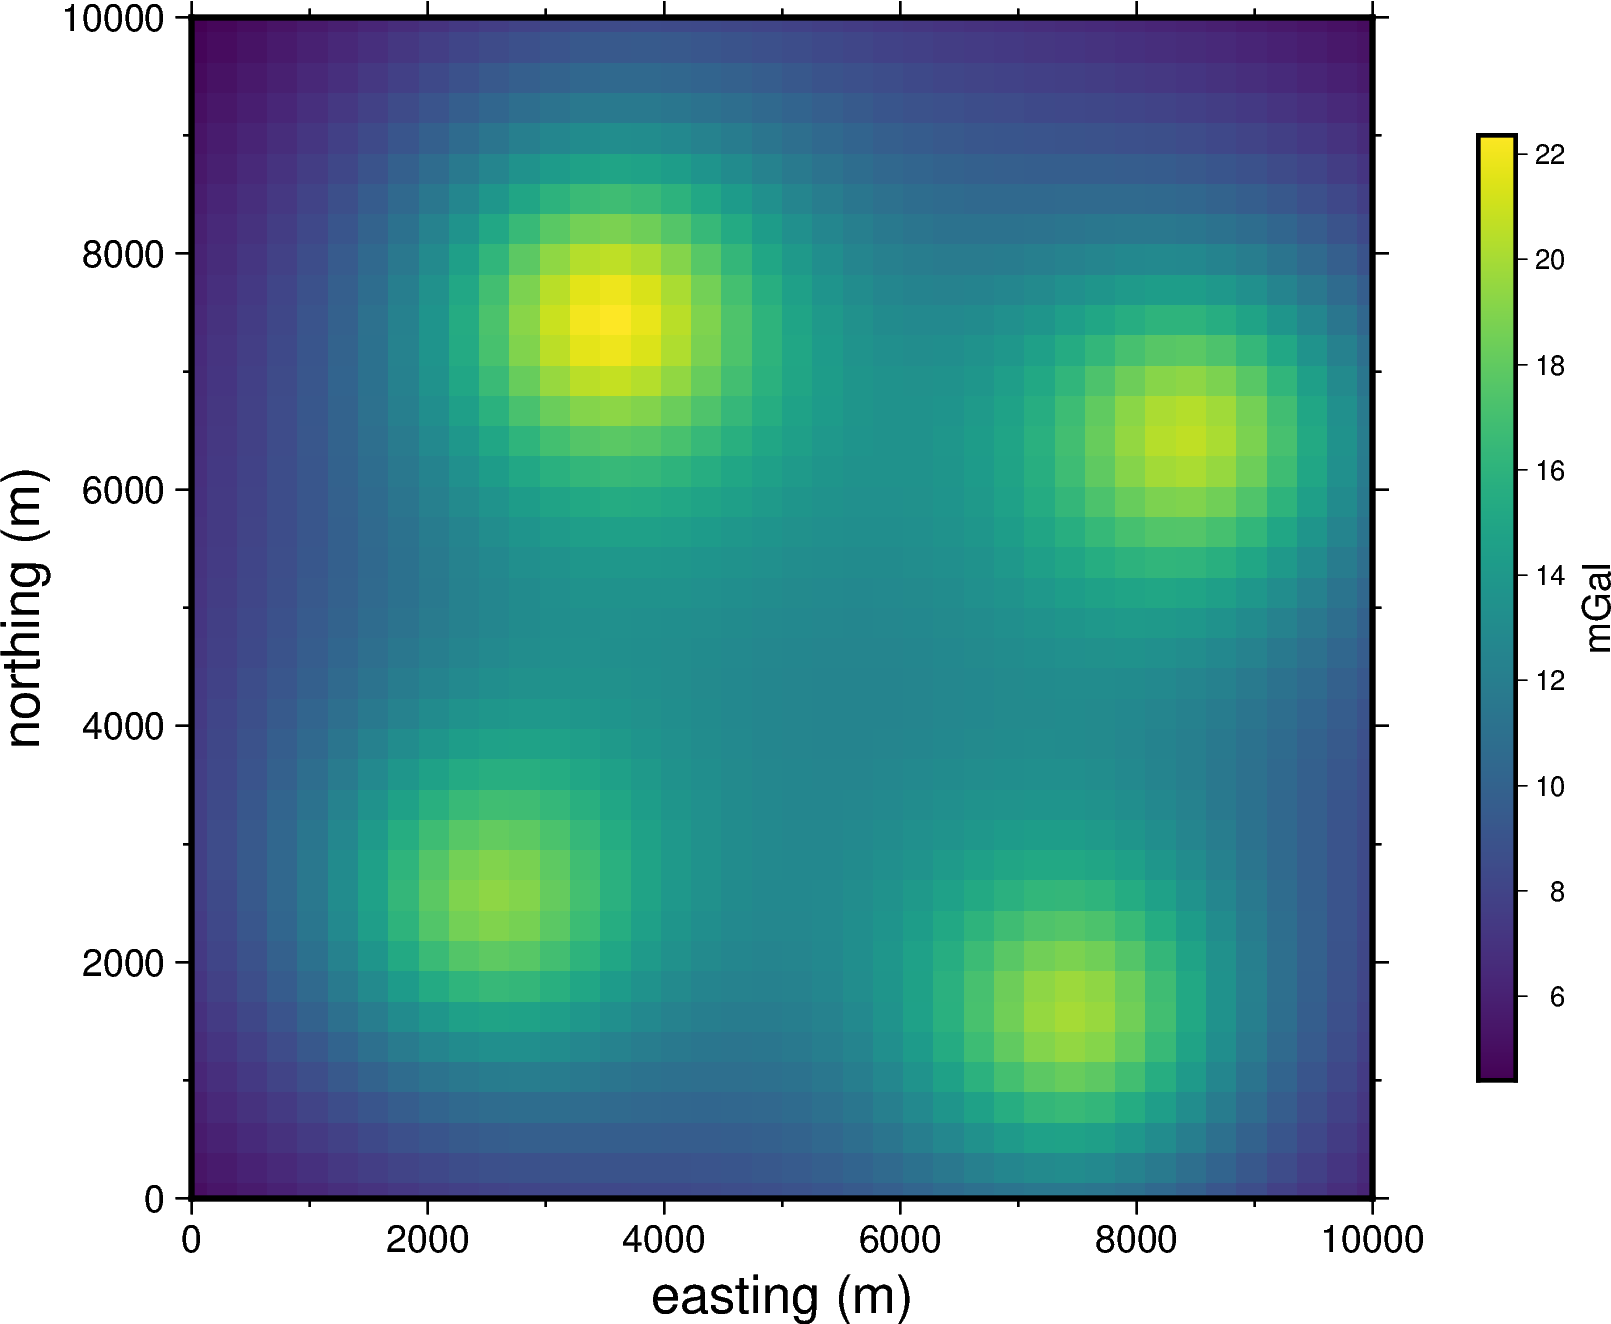

In [16]:
import pygmt
grid = vd.make_xarray_grid(
   coordinates, g_z, data_names="g_z", extra_coords_names="extra")
fig = pygmt.Figure()
fig.grdimage(
   region=(0, 10e3, 0, 10e3),
   projection="X10c",
   grid=grid.g_z,
   frame=["WSne", "x+leasting (m)", "y+lnorthing (m)"],
   cmap='viridis',)
fig.colorbar(cmap=True, position="JMR", frame=["a2", "x+lmGal"])
fig.show()

In [17]:
import numpy as np

prisms = [
    [-5e3, -3e3, -5e3, -2e3, -10e3, -1e3],
    [3e3, 4e3, 4e3, 5e3, -9e3, -1e3],
]

magnetization_easting = np.array([0.5, -0.4])
magnetization_northing = np.array([0.5, 0.3])
magnetization_upward = np.array([-0.78989, 0.2])
magnetization = (
   magnetization_easting, magnetization_northing, magnetization_upward
)

In [18]:
region = (-10e3, 10e3, -10e3, 10e3)
shape = (51, 51)
height = 10
coordinates = vd.grid_coordinates(region, shape=shape, extra_coords=height)

In [19]:
b_e, b_n, b_u = hm.prism_magnetic(coordinates, prisms, magnetization, field="b")

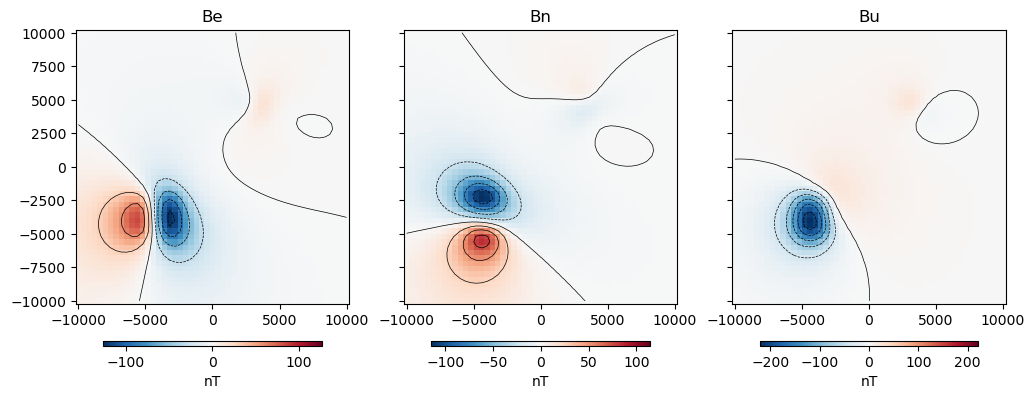

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 6))

for ax, mag_component, title in zip(axes, (b_e, b_n, b_u), ("Be", "Bn", "Bu")):
    maxabs = vd.maxabs(mag_component)
    tmp = ax.pcolormesh(
        coordinates[0],
        coordinates[1],
        mag_component,
        vmin=-maxabs,
        vmax=maxabs,
        cmap="RdBu_r",
    )
    ax.contour(
        coordinates[0],
        coordinates[1],
        mag_component,
        colors="k",
        linewidths=0.5,
    )
    ax.set_title(title)
    ax.set_aspect("equal")
    plt.colorbar(
        tmp,
        ax=ax,
        orientation="horizontal",
        label="nT",
        pad=0.08,
        aspect=42,
        shrink=0.8,
    )

plt.show()

In [21]:
b_u = hm.prism_magnetic(
   coordinates, prisms, magnetization, field="b_u"
)

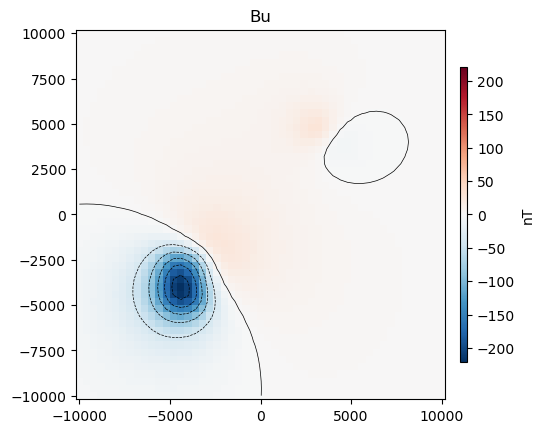

In [22]:
maxabs = vd.maxabs(b_u)

tmp = plt.pcolormesh(
    coordinates[0], coordinates[1], b_u, vmin=-maxabs, vmax=maxabs, cmap="RdBu_r"
)
plt.contour(coordinates[0], coordinates[1], b_u, colors="k", linewidths=0.5)
plt.title("Bu")
plt.gca().set_aspect("equal")
plt.colorbar(tmp, label="nT", pad=0.03, aspect=42, shrink=0.8)
plt.show()

In [23]:
region = (0, 100e3, -40e3, 40e3)
spacing = 2000

In [24]:
easting, northing = vd.grid_coordinates(region=region, spacing=spacing)

In [25]:
wavelength = 24 * spacing
surface = np.abs(np.sin(easting * 2 * np.pi / wavelength))

In [26]:
density = np.full_like(surface, 2700)

In [27]:
prisms = hm.prism_layer(
    coordinates=(easting, northing),
    surface=surface,
    reference=0,
    properties={"density": density},
)

In [28]:
region_pad = vd.pad_region(region, 10e3)
coordinates = vd.grid_coordinates(
    region_pad, spacing=spacing, extra_coords=1e3
)

In [29]:
gravity = prisms.prism_layer.gravity(coordinates, field="g_z")

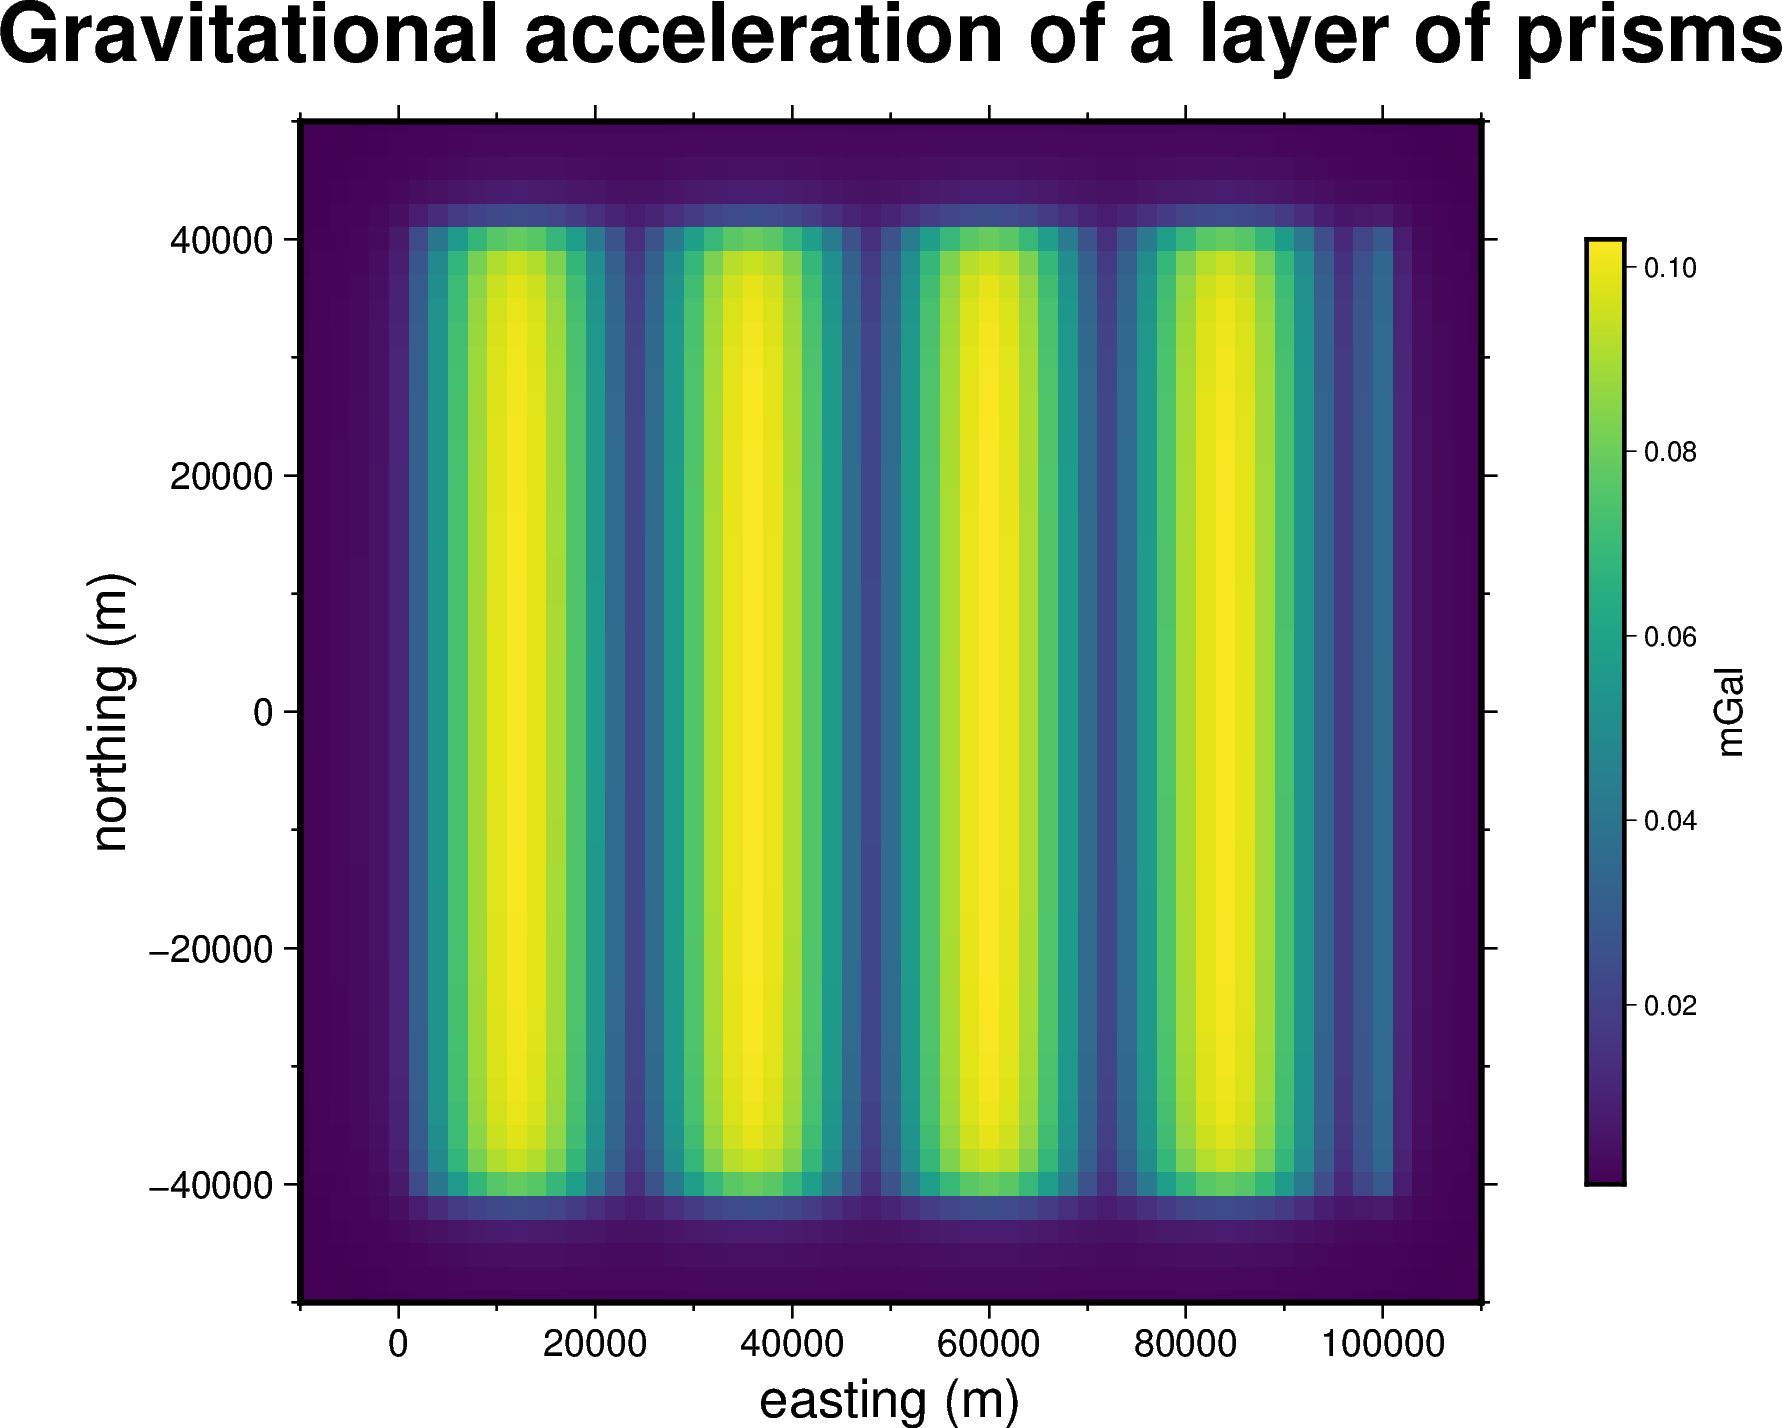

In [30]:
grid = vd.make_xarray_grid(
   coordinates, gravity, data_names="gravity", extra_coords_names="extra")

fig = pygmt.Figure()
title = "Gravitational acceleration of a layer of prisms"
fig.grdimage(
   region=region_pad,
   projection="X10c",
   grid=grid.gravity,
   frame=[f"WSne+t{title}", "x+leasting (m)", "y+lnorthing (m)"],
   cmap='viridis',)
fig.colorbar(cmap=True, position="JMR", frame=["a.02", "x+lmGal"])
fig.show()